In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# 0.) Clean the Apple Data to get a quarterly series of EPS.

In [2]:
y = pd.read_csv('AAPL_quarterly_financials.csv')

In [3]:
y.index = y.name

In [4]:
y = pd.DataFrame(y.loc["BasicEPS",:]).iloc[2:,:]

In [5]:
y.index = pd.to_datetime(y.index)

In [6]:
# Assumptions Null ARE
y = y.fillna(0.).sort_index()

# 2.) Come up with 6 search terms you think could nowcast earnings. (Different than the ones I used) Add in 3 terms that that you think will not Nowcast earnings. Pull in the gtrends data

In [7]:
from pytrends.request import TrendReq

In [8]:
# Create pytrends object
pytrends = TrendReq(hl='en-US', tz=360)

# Set up the keywords and the timeframe
keywords = ["iPhone", "Apple Stores","iWatch","iPad Mini","Apple CFO","Apple Share Price",
            "Adele Ticket","coffee bean","UCLA"] 
start_date = '2004-01-01'
end_date = '2024-01-01'

# Create an empty DataFrame to store the results
df = pd.DataFrame()

# Iterate through keywords and fetch data
for keyword in keywords:
    pytrends.build_payload([keyword], cat=0, timeframe=f'{start_date} {end_date}', geo='', gprop='')
    interest_over_time_df = pytrends.interest_over_time()
    df[keyword] = interest_over_time_df[keyword]

In [9]:
X = df.resample("Q").mean()
temp = pd.concat([y,X],axis=1).dropna()
y = temp[["BasicEPS"]].copy()
X = temp.iloc[:,1:].copy()

# 3.) Normalize all the X data

In [10]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 4.) Run a Lasso with lambda of .5. Plot a bar chart.

In [11]:
from sklearn.linear_model import Lasso
lasso = Lasso(alpha = .1)
lasso.fit(X_scaled,y)
coefficients = lasso.coef_

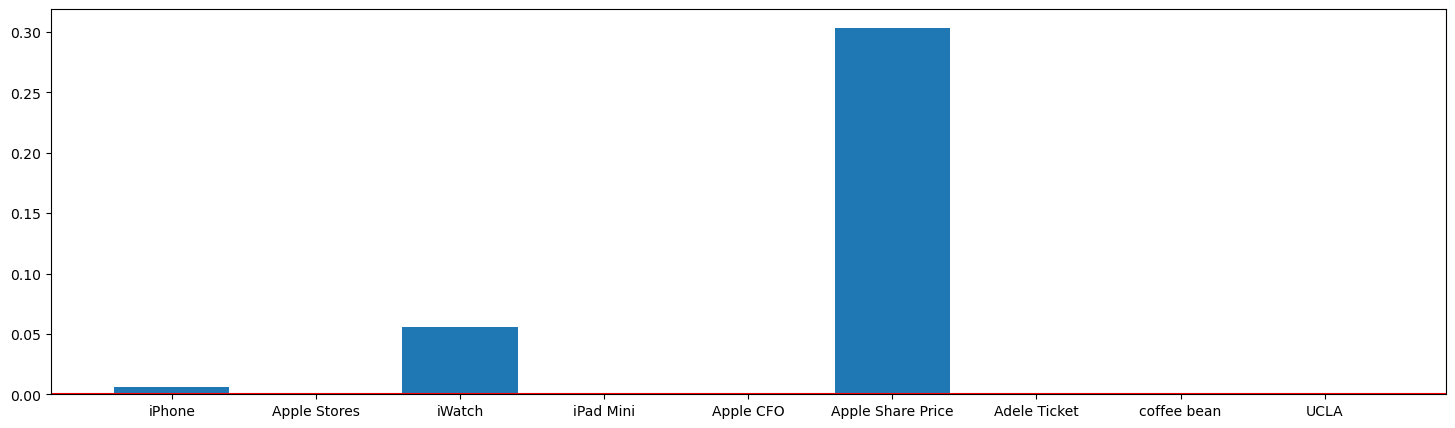

In [12]:
plt.figure(figsize = (18,5))
plt.bar(range(len(coefficients)),coefficients,tick_label=X.columns)
plt.axhline(0.,color = "red")
plt.show()

# 5.) Do these coefficient magnitudes make sense?

Generally speaking, they make sense. Because the most significant coefficient is $Apple Share Price$ and $iWatch$, which is intuitively highly correlated with Apple financials, whereas other coefficients irrelevant to Apple company have lower significance.